# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 5 ноября 2019, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 5 ноября, -4 балла после 06:00 12 ноября, -6 баллов после 06:00 19 ноября  -8 баллов после 06:00 26 ноября.

При отправлении ДЗ указывайте фамилию в названии файла Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:
[ML0919, Задание 2] Фамилия Имя.<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - \alpha *\frac{\partial L}{\partial w}(w_{old}) $$


 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***
$$ \frac{\partial L}{\partial w}  = -\frac{2}{N}\left [ \sum x(y_{i} - a_{i}) \right ] + \sum \frac{2w_{i}}{C} $$

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - \alpha *\frac{\partial L}{\partial w}(w_{old}) $$


 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***
$$ \frac{\partial L}{\partial w} = -\frac{1}{N}\left [ \sum y_{i} *\frac{1}{\sigma}*\sigma(1 - \sigma)*x - (1 -y_{i}*\frac{1}{1-\sigma} *\sigma (1 - \sigma) * x) \right ] + \frac{2w}{C}= -\frac{1}{N}\left [ \sum (y_{i} - \sigma)x \right ] + \sum \frac{2w_{i}}{C} $$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***
1)$$ \frac{ \partial^{2} L}{\partial w_{i} \partial w_{j}} = \frac{2}{N}\left [ \sum x_{i}^{*} x_{j} \right ] = \frac{2}{N} \Gamma(x_{1}, ..., x_{n}) >= 0 $$

2) $$ (X^{T}X + \lambda I)^{-1} X^{T}y $$
$$ (X^{T}X + \lambda I)^{-1} X^{T}y = (V \Lambda U^{T}U \Lambda V^{T} + \lambda I)^{-1} U^{-1}y  = V \Lambda (\Lambda ^{2} + \lambda I)^{-1} U^{T}y \Rightarrow $$
матрица имеет r ненулевых сингулярных чисел, следовательно она ранга r. Следовательно можно получить точное решение.

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***
$$\frac{\partial E(L | x_i)}{\partial a} = -p(y_i = 1 |x_i ) \frac{1}{a(x_i)}   - p(y_i = 0 | x_i) \frac{1}{1 - a(x_i)} = -p(y_i = 1 |x_i ) \frac{1}{a(x_i)} + \frac{1}{1 - a(x_i)} - p(y_i = 1 |x_i ) \frac{1}{1 - a(x_i)} = \frac{1}{1 - a(x_i)} - p(y_i = 1 |x_i ) \frac{1}{(1 - a(x_i))a(x_i)} = 0 \Rightarrow a(x_i) = p(y_i = 1 |x_i ) $$

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***
Не нужно, тк его штрафовать не имеет смысла, тк он не обязан быть маленьким.

#  Реализация линейной модели (5 баллов)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [127]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [128]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [2]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    
    indexes = np.arange(y.shape[0])
    if(shuffle):
        np.random.shuffle(indexes)
    
    for i in range(y.shape[0] // batch_size):
        X_batch = X[indexes[i * batch_size : (i + 1) * batch_size]]
        y_batch = y[indexes[i * batch_size : (i + 1) * batch_size]]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [122]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    return 1 / (1 + np.exp(-x))


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, batch_size = 1, model_type='lin_reg', threshold = 0.5):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.batch_size = batch_size
        self.threshold = threshold
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if(self.model_type == 'lin_reg'):
            loss = np.sum((y_batch - np.dot(X_batch, self.weights)) ** 2) / X_batch.shape[0] 
            
        if(self.model_type == 'log_reg'):
            a = sigmoid(np.dot(X_batch, self.weights))
            loss = -1*np.sum(y_batch * np.log(a) + (1-y_batch)*np.log(1-a)) / X_batch.shape[0]
        return loss + np.sum(self.weights[1:] ** 2) / self.C
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        loss_grad = None
        if(self.model_type == 'lin_reg'):
            a = np.dot(X_batch, self.weights)
            loss_grad = -2 * (np.dot((y_batch-a), X_batch)) / X_batch.shape[0]
            mask = np.ones(X_batch.shape[1])
            mask[0] = 0
            loss_grad += 2 * (self.weights.dot(mask)) / self.C
        if(self.model_type == 'log_reg'):
            a = sigmoid(np.dot(X_batch, self.weights))
            loss_grad = -np.dot((y_batch-a), X_batch) / X_batch.shape[0]
            loss_grad += 2 * (self.weights) / self.C
            
        
        return loss_grad 
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        #print(self.weights)
        self.weights -= self.alpha * new_grad
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        X = (X - self.mean) / self.std
        
        # Нужно инициализровать случайно веса
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.weights = np.random.uniform(0, 2, X.shape[1])
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, batch_size=self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
               #print(batch_grad)
                
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        prob = self.predict_proba(X)
        if(self.model_type == 'lin_reg'):
            return prob
        if(self.model_type == 'log_reg'):
            return np.array(list(map(int, prob > self.threshold)))
                                
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        return y_hat
    def predict_proba(self, X):
        X = (X - self.mean) / self.std
        if(self.model_type == 'lin_reg'):
            return np.dot(np.hstack((np.ones((X.shape[0], 1)), X)), self.weights)
        if(self.model_type == 'log_reg'):
            return sigmoid(np.dot(np.hstack((np.ones((X.shape[0], 1)), X)), self.weights))

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [4]:
def plot_decision_boundary(clf):
    ax = np.linspace(-4, 8, 100)
    ay = np.linspace(-5, 4, 100)
    dd = np.transpose([np.tile(ax, len(ay)), np.repeat(ay, len(ax))])
    otv3 = clf.predict(dd)
    otv3 = np.round(otv3).astype('int')
    plt.scatter(dd[:,0], dd[:,1], c=otv3, alpha= 0.05)


In [14]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

[ 0.43058602  0.31162495 -0.2422302 ]
Линейная регрессия


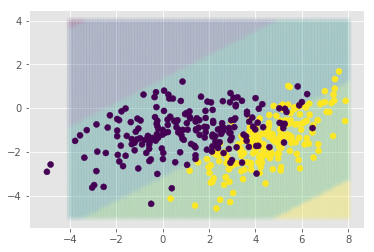

In [246]:
clf = MySGDClassifier(batch_generator, batch_size=10, model_type="lin_reg", max_epoch=1000, alpha=0.001)
clf.fit(X, y)

print(clf.weights)
plot_decision_boundary(clf)

plt.scatter(X[:,0], X[:,1], c=y)
print('Линейная регрессия')

Loss линейной регрессии


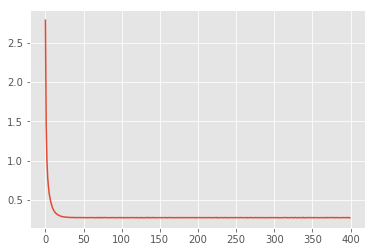

In [247]:
mean_loss = np.array(clf.errors_log['loss']).reshape(-1, 100).mean(axis=1)
plt.plot(mean_loss)
print('Loss линейной регрессии')

[ 6.29330084e-05  1.47741112e-01 -5.11091412e-02]
Логистическая регрессия


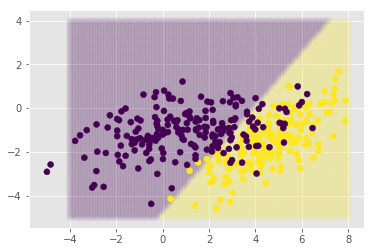

In [89]:
clf = MySGDClassifier(batch_generator, batch_size=10, model_type="log_reg", max_epoch=1000, alpha=0.001)
clf.fit(X, y)

print(clf.weights)
plot_decision_boundary(clf)

plt.scatter(X[:,0], X[:,1], c=y)
print('Логистическая регрессия')

Loss логистической регрессии


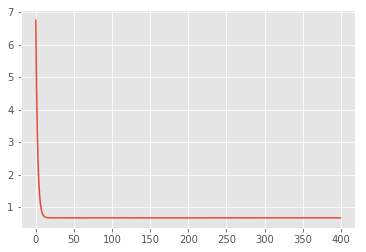

In [90]:
mean_loss = np.array(clf.errors_log['loss']).reshape(-1, 100).mean(axis=1)
plt.plot(mean_loss)
print('Loss логистической регрессии')

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [6]:
from sklearn.datasets import make_classification

In [7]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

In [253]:
## Your Code Here
N = 100
def conv(model = 'lin_reg'):
    alpha = [0.0005, 0.001, 0.01, 0.05]
    for i in alpha:
        clf = MySGDClassifier(batch_generator, batch_size=100, model_type=model, max_epoch=50, alpha=i)
        clf.fit(X, y)
        mean_loss = np.array(clf.errors_log['loss']).reshape(-1, N).mean(axis=1)
        plt.plot(mean_loss, label = 'alpha={}'.format(i))
    plt.legend()

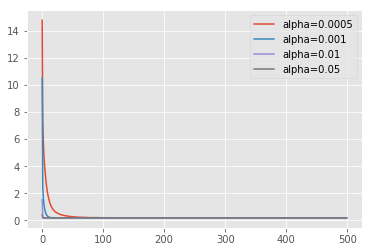

In [254]:
conv('lin_reg')

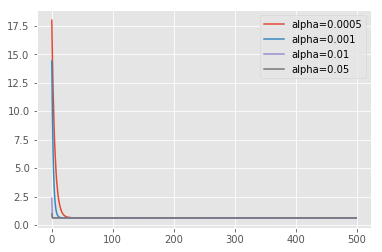

In [255]:
conv('log_reg')

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

In [264]:
## Your Code Here
weights = []
for c in np.logspace(3, -3, 10):
    print(c)
    clf = MySGDClassifier(batch_generator, batch_size=100, model_type='log_reg', max_epoch=500, alpha=0.0001, C=c)
    clf.fit(X, y)
    weights.append(np.mean(np.abs(clf.weights)))

1000.0
215.44346900318845
46.4158883361278
10.0
2.1544346900318843
0.4641588833612782
0.1
0.021544346900318867
0.004641588833612782
0.001


Логистическая регрессия


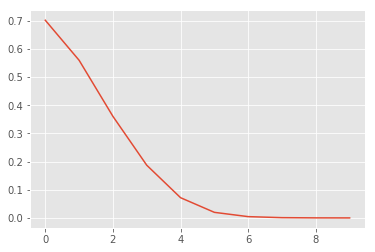

In [265]:
print('Логистическая регрессия')
plt.plot(weights)

In [8]:
weights = []
for c in np.logspace(3, -3, 10):
    print(c)
    clf = MySGDClassifier(batch_generator, batch_size=100, model_type='lin_reg', max_epoch=100, alpha=0.0001, C=c)
    clf.fit(X, y)
    weights.append(np.mean(np.abs(clf.weights)))

1000.0
215.44346900318845
46.4158883361278
10.0
2.1544346900318843
0.4641588833612782
0.1
0.021544346900318867
0.004641588833612782
0.001


Линейная регрессия


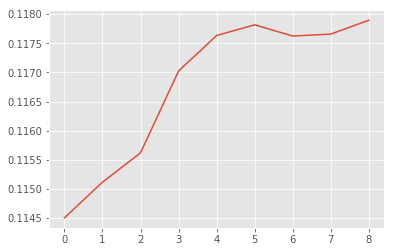

In [10]:
print('Линейная регрессия')
plt.plot(weights[:-1])

Довольны ли Вы, насколько сильно уменьшились Ваши веса?
В случае логистической регрессии однозначно да. С линейной регрессией веса увеличились (при С = 0.001 веса ушли в беконечность).

# Боевое применение (3  балла)

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [103]:
doc_to_title = {}
with open('docs_titles.tsv', encoding='utf-8') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [104]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [105]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [68]:
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import time

In [63]:
batch_sizes = [10, 50, 100, 250, 500, 1000]
epohs = np.logspace(2, 3.5, 6).astype('int')
res = []
X_tr_cv, X_te_cv = X_train[:10000], X_train[10000:]
y_tr_cv, y_te_cv = y_train[:10000], y_train[10000:]
for bs in batch_sizes:
    for ep in epohs:
        start = time.time()
        clf = MySGDClassifier(batch_generator, batch_size=bs, model_type='log_reg', max_epoch=ep, alpha=0.001)  
        clf.fit(X_tr_cv, y_tr_cv)
        y_pred = clf.predict(X_te_cv)
        score = f1_score(y_te_cv, y_pred, average='micro')
        end = time.time()
        if(score > 0.5):
            res.append((end-start, score, bs, ep))
            break           

D:\anaconda\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in multiply


In [64]:
res

[(5.3836095333099365, 0.785207100591716, 10, 100),
 (1.1209938526153564, 0.785207100591716, 50, 100),
 (0.6741983890533447, 0.785207100591716, 100, 100),
 (0.4767293930053711, 0.785207100591716, 250, 100),
 (0.3500680923461914, 0.785207100591716, 500, 100),
 (0.2662837505340576, 0.7609467455621302, 1000, 100)]

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [91]:
C = np.logspace(3, -2, 5)
alpha = [0.1, 0.05, 0.01, 0.005, 0.001]
max_epoch = np.logspace(2, 3.5, 6).astype('int')
model_type = ["log_reg"]
threshold = np.linspace(0, 1, 10)[4:]
results = []
for mt in model_type:
    for c in C:
        for al in alpha:
            for me in max_epoch:
                for th in threshold:
                    clf = MySGDClassifier(batch_generator, batch_size=250, model_type=mt, 
                                          max_epoch=me, alpha=al, C = c, threshold=th)
                    clf.fit(X_tr_cv, y_tr_cv)
                    y_pr = clf.predict(X_te_cv)
                    score = roc_auc_score(y_te_cv, y_pr, average='micro')
                    results.append([score, mt, c, al, me, th])

D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\

D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\

D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\

D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\

D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\

D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\

D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\

D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\

D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\

D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\

D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\

D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\

D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\

D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\

D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\

D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packa

D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packa

D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packa

D:\anaconda\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in double_scalars
D:\anaconda\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in square
D:\anaconda\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: overflow encountered in true_divide
D:\anaconda\lib\site-packages\ipykernel_launcher.py:121: RuntimeWarning: invalid value encountered in greater
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in double_scalars
D:\anaconda\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in square
D:\anaconda\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: overflow encountered in true_divide
D:\anaconda\lib\site-packages\

D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
D:\anaconda\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in square
D:\anaconda\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: overflow encountered in true_divide
D:\anaconda\lib\site-packages\ipykernel_launcher.py:121: RuntimeWarning: invalid value encountered in greater
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: overf

D:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
D:\anaconda\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in square
D:\anaconda\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: overflow encountered in true_divide
D:\anaconda\lib\site-packages\ipykernel_launcher.py:121: RuntimeWarning: invalid value encountered in greater
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in double_scalars
D:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
D:\anaconda\lib\site

D:\anaconda\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in square
D:\anaconda\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: overflow encountered in true_divide
D:\anaconda\lib\site-packages\ipykernel_launcher.py:121: RuntimeWarning: invalid value encountered in greater
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in double_scalars
D:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
D:\anaconda\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in square
D:\anaconda\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: overflow en

D:\anaconda\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: overflow encountered in true_divide
D:\anaconda\lib\site-packages\ipykernel_launcher.py:121: RuntimeWarning: invalid value encountered in greater
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in double_scalars
D:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
D:\anaconda\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in square
D:\anaconda\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: overflow encountered in true_divide
D:\anaconda\lib\site-packages\ipykernel_launcher.py:121: RuntimeWarning: inval

D:\anaconda\lib\site-packages\ipykernel_launcher.py:121: RuntimeWarning: invalid value encountered in greater
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in double_scalars
D:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
D:\anaconda\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in square
D:\anaconda\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: overflow encountered in true_divide
D:\anaconda\lib\site-packages\ipykernel_launcher.py:121: RuntimeWarning: invalid value encountered in greater
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divi

D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\

D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
D:\anaconda\lib\site-packa

In [93]:
max(results, key= lambda i: i[0])

[0.7823715263231392, 'log_reg', 1000.0, 0.001, 100, 0.8888888888888888]

In [101]:
sorted(results, key= lambda i: i[0])[-10:]

[[0.7796513522319974,
  'log_reg',
  3.1622776601683795,
  0.05,
  1584,
  0.4444444444444444],
 [0.7796513522319974,
  'log_reg',
  3.1622776601683795,
  0.01,
  398,
  0.4444444444444444],
 [0.7796513522319974,
  'log_reg',
  3.1622776601683795,
  0.01,
  1584,
  0.4444444444444444],
 [0.7796513522319974,
  'log_reg',
  3.1622776601683795,
  0.01,
  3162,
  0.4444444444444444],
 [0.7796513522319974,
  'log_reg',
  3.1622776601683795,
  0.005,
  100,
  0.4444444444444444],
 [0.7798884583158777,
  'log_reg',
  3.1622776601683795,
  0.1,
  100,
  0.4444444444444444],
 [0.7798884583158777,
  'log_reg',
  3.1622776601683795,
  0.001,
  199,
  0.4444444444444444],
 [0.7803626704836383,
  'log_reg',
  3.1622776601683795,
  0.1,
  398,
  0.4444444444444444],
 [0.78085870222967,
  'log_reg',
  3.1622776601683795,
  0.1,
  1584,
  0.4444444444444444],
 [0.7823715263231392, 'log_reg', 1000.0, 0.001, 100, 0.8888888888888888]]

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук прислать Ваш ник на kaggle, под которым Вы залили решение, которое побило первый бейзлайн. **

In [117]:
import pandas as pd
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

In [119]:
import numpy as np
X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape)

(16627, 15) (16627,)


In [126]:
best_clf = MySGDClassifier(batch_generator, batch_size=250, model_type='log_reg', 
                                          max_epoch=3000, alpha=0.01, C = 4, threshold=0.4)
best_clf.fit(X_train, y_train)
pred = best_clf.predict(X_test)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply


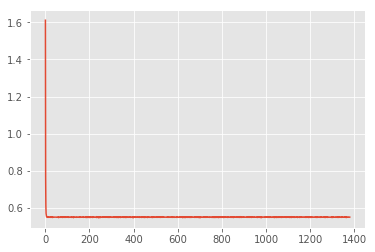

In [127]:
mean_loss = np.array(best_clf.errors_log['loss']).reshape(-1, 100).mean(axis=1)
plt.plot(mean_loss)

In [128]:
test_data["target"] = pd.Series(pred)
with open("predict.csv", "w") as f:
    f.write(test_data.to_csv(columns=("pair_id", "target"), index=False))

# Ник: Necks5

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?


***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***